# Chapter 42: Inference over Graphs

### This code generates figure 5 and data for figure 6 Chapter 42: Inference over Graphs (vol. II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy
4. networkx

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import networkx as nx
from functions import hierarchy_pos

## Example 42.2 (Constructing a directed graph from heart disease dataset)

We apply the Chow--Liu procedure to the same heart disease dataset encountered earlier in Example 31.4 and described briefly at the end of Chapter 31. The dataset consists of 297 samples with feature vectors that have been transformed to contain 25 binary attributes each. The attributes are listed in Table 42.6 along with the last row, which lists a node to identify the class variable: $\gamma=1$ (heart disease is present) and $\gamma=0$ (heart disease is absent).  We  have a total of $K=26$ random variables. The objective is to determine a directed spanning tree that links these variables. We will examine this same dataset later in Example 54.3, as well as explain the origin of the binary attributes, when we construct a decision tree for it  --- see  Fig. 54.7.

**Table 42.6** Binary attributes for the heart disease dataset. The dataset is derived from the site https://archive.ics.uci.edu/ml/datasets/heart+Disease.
<table style="width: 70%;">
    <tr>
    <th>Attribute</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <th>1</th>
    <th> 1 (patient's age above average), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>2</th>
    <th>1 (male), 0 (female)</th>
  </tr>
  <tr>
    <th>3</th>
    <th>1 (chest pain is typical angina), 0 (othewrwise)</th>
  </tr>
  <tr>
    <th>4</th>
    <th>1 (chest pain is atypical angina), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>5</th>
    <th>1 (chest pain is non-anginal), 0 (otherwise)</th>
  </tr>   
  <tr>
    <th>6</th>
    <th>1 (chest pain is asymptomatic), 0 (otherwise)</th>
  </tr>  
  <tr>
    <th>7</th>
    <th>1 (blood pressure above average), 0 (othewrwise)</th>
  </tr>
  <tr>
    <th>8</th>
    <th>1 (cholesterol level above average), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>9</th>
    <th>1 (blood sugar level above average), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>10</th>
    <th>1 (electrocardiographic result is normal), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>11</th>
    <th>1 (electrocardiographic result is abnormal), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>12</th>
    <th>1 (electrocardiographic result shows hypertrophy), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>13</th>
    <th>1 (heart rate above average), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>14</th>
    <th>1 (if angina is exercise induced), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>15</th>
    <th>1 (if size of ST depression is above average), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>16</th>
    <th>1 (if ST segment is upsloping), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>17</th>
    <th>1 (if ST segment is flat), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>18</th>
    <th>1 (if ST segment is downsloping), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>19</th>
    <th>1 (if no vessels are colored by fluoroscopy), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>20</th>
    <th>1 (if one vessel is colored by fluoroscopy), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>21</th>
    <th>1 (if two vessels are colored by fluoroscopy), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>22</th>
    <th>1 (if three vessels are colored by fluoroscopy), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>23</th>
    <th>1 (if thal condition is normal), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>24</th>
    <th>1 (if thal has fixed defect), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>25</th>
    <th>1 (if thal has reversible defect), 0 (otherwise)</th>
  </tr>
  <tr>
    <th>26</th>
    <th>1 (patient has heart disease), 0 (otherwise)</th>
  </tr>
</table>

We select $238$ samples for training, and keep the remaining $59$ samples for testing. The sample size is small in this case. Nevertheless, it is sufficient to illustrate the procedure for constructing a spanning tree. We use the training data to estimate all marginal and pairwise joint probabilities, as well as the pairwise mutual information measures on all possible edges. For representation purposes, we associate a score $\alpha(k)$ with each node $k$  that is equal to the total sum of the mutual information values with the other nodes:

$$
\alpha(k) =\sum_{k'\neq k}^{K} \widehat{I}(\boldsymbol{x}_{k},\boldsymbol{x}_{k'}) \tag{42.76}
$$

Figure 42.5 plots the resulting fully connected graph where every pair of nodes with nonzero mutual information is connected. Nodes represented by larger circles have a larger score $\alpha(k)$.

In [137]:
# Using the heart-disease dataset
# We first transform all attributes into binary-valued
#
# This heart disease dataset consists of 297 samples with 13 attributes each.
# It is derived from the processed cleveland dataset from the site
# https://archive.ics.uci.edu/ml/datasets/heart+Disease 
#
# The 13 attributes are
#
# 1. age in years 
# 2. sex (1:male, 0:female) 
# 3. chest pain type:  typical angina (value 1), atypical angina (2), 
#    non-anginal pain (3), asymptomatic (4).
# 4. resting blood pressure (in mm Hg on admission to the hospital)  
# 5. serum cholesterol in mg/dl  
# 6. fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
# 7. resting electrocardiographic results 
#     a) value 0: normal 
#     b) value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#     c) value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
# 8. maximum heart rate (bpm) achieved 
# 9. exercise induced angina (1 = yes; 0 = no) 
# 10. ST depression induced by exercise relative to rest  
# 11. Slope of the peak exercise ST segment 
#     a) value 1: upsloping 
#     b) value 2: flat 
#     c) value 3: downsloping  
# 12. number of major vessels (0-3) colored by flouroscopy
# 13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect 
#   
#
# The class type is
#      class 0 (no heart disease): <50% diameter narrowing
#      classes 1, 2, 3 (heart disease): >50% diameter narrowing

heart_disease_data = scipy.io.loadmat("data/heart_disease_data_original.mat") # loaded data
labels_multi = heart_disease_data['labels'] # has five classes 0 (no heart disease) and 1, 2, 3, 4 (heart disease)
features_org = heart_disease_data['Ao'] # original feature vectors with 13 attributes

labels = np.copy(labels_multi)

N = features_org.shape[0]
M = features_org.shape[1]

# we transform the labels to +1 (heart disease) and 0 (no heart disease)
# binary as well

for n in range(N):
    if labels_multi[n] != 0:
        labels[n] = + 1
    else:
        labels[n] = 0

# We transform the features into binary values
# We add the label as one more attribute; we will end up with 26 attributes (Rvs)

# Age is in years, we compute the average age and replace by 1 if age larger than average, and 0 otherwise

features = np.zeros((N, M+3+2+2+3+2+1))
features[:, 25] = labels.reshape(-1)

mean_age = features_org[:, 0].mean()
for n in range(N):
    if features_org[n, 0] >= mean_age:
        features[n, 0] = 1
    else:
        features[n, 0] = 0

# sex (male = 1, female = 1) is already binary

features[:, 1] = features_org[:, 1]

# chest pain type: typicial angina (value 1), atypical angina (2), 
# non-anginal pain (3), asymptmatic (4)
# we make each binary value and therefore replace this column by columns

for n in range(N):
    if features_org[n, 2] == 1:
        features[n, 2] = 1
    elif features_org[n, 2] == 2:
        features[n, 3] = 1
    elif features_org[n, 2] == 3:
        features[n, 4] = 1
    elif features_org[n, 2] == 4:
        features[n, 5] = 1

# Resting blood pressure measured in mm Hg
# We compute its average and replace by a binary variable (larger or smaller than average)

mean_pressure = features_org[:, 3].mean()
for n in range(N):
    if features_org[n, 3] >= mean_pressure:
        features[n, 6] = 1
    else:
        features[n, 6] =0

# Serum cholesteral measured in mg/dl
# We compute its average and replace by a binary variable (larger or smaller than average)

mean_serum = features_org[:, 4].mean()
for n in range(N):
    if features_org[n, 4] >= mean_serum:
        features[n, 7] = 1
    else:
        features[n, 7] =0

# fasting blood sugar > 120 mg/ld is binary already
features[:, 8] = features_org[:, 5]

# resting electrocardiographic results has 3 values; we add 3 binary columns

for n in range(N):
    if features_org[n, 6] == 0:
        features[n, 9] = 1
    elif features_org[n, 6] == 1:
        features[n, 10] = 1
    else:
        features[n, 11] = 1

# maximun heart rate in bpm
# we compute its average and replace by a binary column (larger or smaller than average)

mean_rate = features_org[:, 7].mean()
for n in range(N):
    if features_org[n, 7] >= mean_rate:
        features[n, 12] = 1
    else:
        features[n, 12] = 0

# exercise induced angina is binary already
features[:, 13] = features_org[:, 8]

# ST depression induce by exercise relative to rest
# We compute its average and transform into binary column (larger or smaller than average)

mean_ST = features_org[:, 9].mean()
for n in range(N):
    if features_org[n, 9] >= mean_ST:
        features[n, 14] = 1

# Slope of the peak exercise ST segment has 3 values. We replace by three binary columns

for n in range(N):
    if features_org[n, 10] == 1:
        features[n, 15] = 1
    elif features_org[n, 10] == 2:
        features[n, 16] = 1
    elif features_org[n, 10] == 3:
        features[n, 17] = 1

# number of major vessels (0-3) colored by flourosopy
# We replace by four binary columns

for n in range(N):
    if features_org[n, 11] == 0:
        features[n, 18] = 1
    elif features_org[n, 11] == 1:
        features[n, 19] = 1
    elif features_org[n, 11] == 2:
        features[n, 20] = 1
    else:
        features[n, 21] = 1

# thal has 3 values. We replace by three binary columns
for n in range(N):
    if features_org[n, 12] == 3:
        features[n, 22] = 1
    elif features_org[n, 12] == 6:
        features[n, 23] = 1
    else:
        features[n, 24] = 1


# training and test data
Ntotal = features.shape[0] # total number of data points (Ntotal=297)
N = 238 # using the top 85 samples for training; keep the rest for testing if necessary
M = features.shape[1] # each feature vector has M=26 binary attributes

# Running Chow-Liu algorithm

# We first compute the mutual information between all nodes assuming a fully connected graph

# finding the marginal probabilities
marg_probs = np.zeros((2, M)) # each column if prob(x_m=0) and prob(x_m=1)
for m in range(M): # iterate over attributes to find their probabilites
    counter_0 = 0 # counts how many times attribute x_m is zero
    counter_1 = 0 # or 1

    for n in range(N): # iterating over all data for eah attribute m
        x = features[n, m]
        if x == 0:
            counter_0 += 1
        else:
            counter_1 += 1
    marg_probs[0, m] = (counter_0+1) / (N+2) # uses Laplace smoothing
    marg_probs[1, m] = (counter_1+1) / (N+2) # p0+p1=1


#finding the joint probabilities P(x_m, x_k)
joint_probs_cell = np.zeros((M, M, 4)) # an array; each plane corresponds to one node m and contains four columns
                      # prob(x_m=0, k = 0); prob(x_m = 0, k = 1); prob(x_m = 1, k = 0); prob(x_m = 1, k = 1)
                      # joint_probs_cell[m, k, 1:4]

for m in range(M): # iterate over attributes to find their probabilities
    for k in range(m, M):
        for n in range(N):
            x = features[n, m]
            y = features[n, k]

            if (x==0) and (y==0): # counters
                joint_probs_cell[m, k, 0] += 1
            elif (x==0) and (y==1):
                joint_probs_cell[m, k, 1] += 1
            elif (x==1) and (y==0):
                joint_probs_cell[m, k, 2] += 1
            else:
                joint_probs_cell[m, k, 3] += 1

# completing by simmetry
for k in range(M): # iterate over attributes to find their probabilities
    for m in range(k, M):
        joint_probs_cell[m, k, 0] = joint_probs_cell[k, m, 0]
        joint_probs_cell[m, k, 1] = joint_probs_cell[k, m, 1]
        joint_probs_cell[m, k, 2] = joint_probs_cell[k, m, 2]
        joint_probs_cell[m, k, 3] = joint_probs_cell[k, m, 3]

for m in range(M):
    for k in range(M): # transforming into probabilities using Laplace Smoothing
        joint_probs_cell[m, k, 0] = (joint_probs_cell[m, k, 0] + 1) / (N+4)
        joint_probs_cell[m, k, 1] = (joint_probs_cell[m, k, 1] + 1) / (N+4)
        joint_probs_cell[m, k, 2] = (joint_probs_cell[m, k, 2] + 1) / (N+4)
        joint_probs_cell[m, k, 3] = (joint_probs_cell[m, k, 3] + 1) / (N+4)

MI = -100*np.eye(M) # matrix to collect all mutual information values
for m in range(M):
    p0m = marg_probs[0, m] # marginal probabilities for node m
    p1m = marg_probs[1, m]
    for k in range(m, M):
        p0k = marg_probs[0, k] # marinal probabilities for node m
        p1k = marg_probs[1, k]
        jp00 = joint_probs_cell[m, k, 0] # joint probabilities with node k
        jp01 = joint_probs_cell[m, k, 1] 
        jp10 = joint_probs_cell[m, k, 2] 
        jp11 = joint_probs_cell[m, k, 3] 

        # mutual information; we are computing upper part of the matrix MI
        MI[m, k] = jp00*np.log(jp00/(p0m*p0k)) + jp01*np.log(jp01/(p0m*p1k))
        MI[m, k] += jp10*np.log(jp10/(p1m*p0k)) + jp11*np.log(jp11/(p1m*p1k))

for k in range(M):
    for m in range(k, M):
        MI[m, k] = MI[k, m]

maximun_MI = MI.max() # maximun MI value


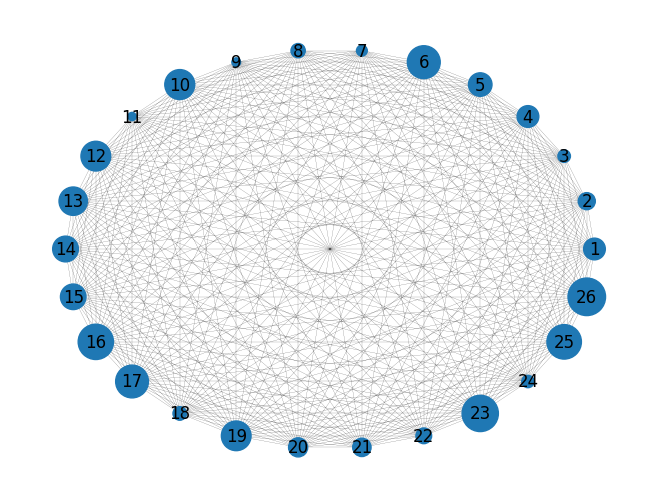

In [169]:
# plotting a fully-connected network based on mutual information measures
MIx = np.copy(MI)
for k in range(M):
    MIx[k, k] = 0 # eliminates the diagonal entries; no need for self loops

alpha_vec = np.zeros(M)
for m in range(M):
    alpha_vec[m] = MIx[m, :].sum() # add mutual information from neighbors

# figure 5 (fully connected network)

graph = nx.from_numpy_array(MIx) # construct a graph from A
mapping = {n: n+1 for n in range(26)} # mapping to starts counting in 1 instead of zeros the node labels
graph = nx.relabel_nodes(graph, mapping) 
nx.draw(graph, node_size=600*alpha_vec, pos=nx.circular_layout(graph), width=0.1, with_labels=True)

plt.savefig("figs/fig-4.pdf", format="pdf", bbox_inches="tight")

**Figure 42.5** A fully-connected graph based on the mutual information values computed from the training data: any two nodes with nonzero mutual information are connected. Nodes represented by larger circles have a larger score $\alpha(k)$.

We list in (42.77) the 100 edges with the largest mutual information values. The largest value is normalized to 1, which occurs on the edge linking nodes $12$ and $10$; the actual value was $\widehat{I}(x_{12},x_{10})=0.6234$.

$$
\begin{array}{cc|}
(12,10)&    1.0000\\
(25,23)&    0.8081\\
(17,16)&    0.7107\\
(6,5)&    0.3627\\
(20,19) &   0.3407\\
(26,6)  &  0.2258\\
(26,23)  &  0.2222\\
(16,15)  &  0.2136\\
(26,25)  &  0.2042\\
(26,19) &   0.1698\\
(21,19)  &  0.1649\\
(16,13)  &  0.1561\\
(6,4)  &  0.1544\\
(26,14)  &  0.1507\\
(14,6 )& 0.1499\\
(26,16)& 0.1361\\
(17,13)& 0.1337\\
(26,13)& 0.1270\\
(17,15)& 0.1180\\
(23,2)& 0.1175\\
(26,17)& 0.1142\\
(14,13)& 0.1108\\
(22,19)& 0.1037\\
(26,15)& 0.1019\\
(23,16)& 0.0940
\end{array} \;\;
\begin{array}{cc|}
(13,   6)& 0.0913\\
(25,   2)& 0.0862\\
(19,    1)& 0.0791\\
(15,   13)& 0.0784\\
(23,   13)& 0.0775\\
(5,   4)& 0.0763\\
(23,    14)& 0.0756\\
(23,   6)& 0.0741\\
(25,   6)& 0.0735\\
(26,    1)& 0.0730\\
(25,    14)& 0.0722\\
(23,   17)& 0.0682\\
(26,   5)& 0.0668\\
(18,   16)& 0.0643\\
(25,   16)& 0.0638\\
(6,    3)& 0.0633\\
(25,    15)& 0.0620\\
(8,   1)& 0.0604\\
(26,    4)& 0.0590\\
(18,    17)& 0.0583\\
(7,   1)& 0.0577\\
(26,    2)& 0.0577\\
(25,   13)& 0.0554\\
(14,   5)& 0.0553\\
(16,   14)& 0.0552
\end{array} \;\;
\begin{array}{cc|}
(22,   13)& 0.0525\\
(19,   13)& 0.0523\\
(23,   15)& 0.0516\\
(23,   19)& 0.0506\\
(15,   14)& 0.0501\\
(26,    21)& 0.0484\\
(13,   4)& 0.0450\\
(25,    17)& 0.0443\\
(21,    1)& 0.0435\\
(18,    15)& 0.0425\\
(26,    22)& 0.0425\\
(17,    14)& 0.0424\\
(24,    23)& 0.0421\\
(15,   4)& 0.0417\\
(21,   6)& 0.0413\\
(19,   6)& 0.0409\\
(16,   1)& 0.0404\\
(25,   19)& 0.0392\\
(13,   1)& 0.0388\\
(16,    6)& 0.0386\\
(14,   4)& 0.0374\\
(17,   6)& 0.0358\\
(25,    4)& 0.0356\\
(15,    1)& 0.0353\\
(26,    10)& 0.0330
\end{array} \;\;
\begin{array}{cc}
(26,   8)& 0.0322\\
(10,    8)& 0.0320\\
(26,   20)& 0.0315\\
(23,   4)& 0.0307\\
(16,   10)& 0.0306\\
(21,   20)& 0.0304\\
(26,    12)& 0.0300\\
(16,    4)& 0.0296\\
(17,    1)& 0.0295\\
(12,    8)& 0.0294\\
(5,    3)& 0.0288\\
(16,   12)& 0.0281\\
(19,   14)& 0.0281\\
(23,   1)& 0.0270\\
(6,   1)& 0.0268\\
(21,   5)& 0.0262\\
(10,   6)& 0.0261\\
(19,   8)& 0.0251\\
(15,    6)& 0.0248\\
(23,    5)& 0.0247\\
(12,    6)& 0.0236\\
(4,   1)& 0.0233\\
(19,    15)& 0.0225\\
(25,    24)& 0.0222\\
(10,   4)& 0.0217
\end{array}
$$

Edges with the highest mutual information values are added to the spanning tree as long as they do not introduce cycles and each node has a single parent. The resulting spanning tree based on the limited amount of training data is shown in Fig. 42.6. We selected node $1$ as root node and added directed arrows moving away from it throughout the graph. This example is pursued further in Probs. 42.5 and 42.8.

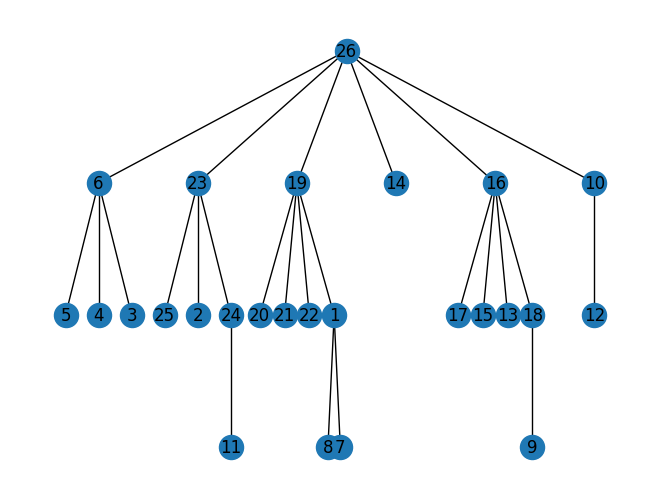

In [168]:
# We now run Python's function corresponding to the Kruskal algorithm
# to find a spannong tree over a weighted graph. The function however minimizes 
# the total weights, rather than maximizing them. For this reason we will feed it the 
# negative of the MI matrix (mututal information matrix)

# We need to prepare the data in the form required by the Python's function

graph_inverted = nx.from_numpy_array(-MIx)

mapping = {n: n+1 for n in range(26)} # mapping to starts counting in 1 instead of zeros the node labels
graph_inverted = nx.relabel_nodes(graph_inverted, mapping) 

spanning_tree = nx.minimum_spanning_tree(graph_inverted)
pos = hierarchy_pos(spanning_tree, 26)  # function to plot in a tree layout; setting the node 25 to be the root

nx.draw(spanning_tree, with_labels=True, pos=pos)

plt.savefig("figs/fig-6.pdf", format="pdf", bbox_inches="tight")

**Figure 42.6** A spanning tree obtained by applying the Chow--Liu procedure to $N=238$ samples from the heart disease dataset.  This dataset is derived from the processed Cleveland data from the site https://archive.ics.uci.edu/ml/datasets/heart+Disease.